<a href="https://colab.research.google.com/github/Mahmoudkhaled17/nlp-model-datapreprocessing/blob/main/nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets
from datasets import load_dataset
dataset = load_dataset("sepidmnorozy/Arabic_sentiment")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.3 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/2468 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/353 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/706 [00:00<?, ? examples/s]

In [ ]:
train_text=dataset["train"]["text"]

In [ ]:
train_text[0:10]

['ربك دايما جنبك لو نديته هتلاقيه\xa0',
 'بعئد',
 'إذا استمرت القيادة المصرية الحالية في نهجها فسنرى تمردا وإرهابا في #مصر',
 '#توقف_الواتساب',
 'المعنى الحقيقي للوطنية المعنى الحقيقي للضحكة الصافية #باسم"',
 'رحم الله الأستاذ سلامة أحمد سلامة، قلم الضمير والإنسانية والتسامح وحب المساواة تعلمت من كتاباته ومنه الكثير ستفتقده مصر في لحظة صعبة',
 '\ufeff أصلا ابو وديع لو كان اجا كان خسر ',
 'اعتراف من نقابة الصحفيين الفاسدة: هناك مناخ معادى لحرية الصحافة بعد الانقلاب أكثر من إى وقت سابق، الصحافة اتهانت',
 'زاهر ده كنز من كنوز مصر علاء وجمال مبارك وراء نجاح دورة حوض النيل #',
 '\ufeffالله الله عليك يا استاذ عمر و بارك الله لك و بارك عليك و جزاك الله عنا خيرا كثير']

In [ ]:
import re

clean_text = []
for text in train_text:
    cleaned = re.sub('\w*\d\w*', ' ', text)  # Apply re.sub to each string individually
    clean_text.append(cleaned)

clean_text[0:10]

['ربك دايما جنبك لو نديته هتلاقيه\xa0',
 'بعئد',
 'إذا استمرت القيادة المصرية الحالية في نهجها فسنرى تمردا وإرهابا في #مصر',
 '#توقف_الواتساب',
 'المعنى الحقيقي للوطنية المعنى الحقيقي للضحكة الصافية #باسم"',
 'رحم الله الأستاذ سلامة أحمد سلامة، قلم الضمير والإنسانية والتسامح وحب المساواة تعلمت من كتاباته ومنه الكثير ستفتقده مصر في لحظة صعبة',
 '\ufeff أصلا ابو وديع لو كان اجا كان خسر ',
 'اعتراف من نقابة الصحفيين الفاسدة: هناك مناخ معادى لحرية الصحافة بعد الانقلاب أكثر من إى وقت سابق، الصحافة اتهانت',
 'زاهر ده كنز من كنوز مصر علاء وجمال مبارك وراء نجاح دورة حوض النيل #',
 '\ufeffالله الله عليك يا استاذ عمر و بارك الله لك و بارك عليك و جزاك الله عنا خيرا كثير']

In [ ]:
# prompt: clean arabic text

clean_text_no_english = []
arabic_pattern = re.compile(r'[\u0600-\u06FF]+')

for text in clean_text:
  cleaned = " ".join(arabic_pattern.findall(text))
  clean_text_no_english.append(cleaned)

clean_text_no_english[0:10]


['ربك دايما جنبك لو نديته هتلاقيه',
 'بعئد',
 'إذا استمرت القيادة المصرية الحالية في نهجها فسنرى تمردا وإرهابا في مصر',
 'توقف الواتساب',
 'المعنى الحقيقي للوطنية المعنى الحقيقي للضحكة الصافية باسم',
 'رحم الله الأستاذ سلامة أحمد سلامة، قلم الضمير والإنسانية والتسامح وحب المساواة تعلمت من كتاباته ومنه الكثير ستفتقده مصر في لحظة صعبة',
 'أصلا ابو وديع لو كان اجا كان خسر',
 'اعتراف من نقابة الصحفيين الفاسدة هناك مناخ معادى لحرية الصحافة بعد الانقلاب أكثر من إى وقت سابق، الصحافة اتهانت',
 'زاهر ده كنز من كنوز مصر علاء وجمال مبارك وراء نجاح دورة حوض النيل',
 'الله الله عليك يا استاذ عمر و بارك الله لك و بارك عليك و جزاك الله عنا خيرا كثير']

In [ ]:
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

arb_stopwords = set(stopwords.words("arabic"))
print(arb_stopwords)

{'خمسمئة', 'كم', 'يورو', 'فاء', 'دينار', 'تموز', 'صبر', 'د', 'إحدى', 'ذِي', 'أخٌ', 'أصبح', 'بخ', 'ين', 'حبذا', 'أمس', 'ضحوة', 'هم', 'أنتما', 'ستمائة', 'عليك', 'في', 'ك', 'ترك', 'اللتين', 'حاء', 'ما انفك', 'اربعين', 'هاهنا', 'صهْ', 'مه', 'ضاد', 'وإذ', 'آب', 'ذي', 'لكم', 'ظ', 'آض', 'هللة', 'سبت', 'صهٍ', 'كأنما', 'هاتان', 'والذين', 'ريال', 'أم', 'آمينَ', 'أولئك', 'رويدك', 'ءَ', 'لكي', 'تِه', 'إيهٍ', 'درى', 'رجع', 'يا', 'بؤسا', 'قاف', 'هما', 'سبع', 'هَاتانِ', 'ر', 'عجبا', 'ن', 'إليكما', 'أقل', 'لما', 'أكتوبر', 'ليست', 'هَجْ', 'بل', 'اثنين', 'هَذا', 'وهب', 'ي', 'طَق', 'به', 'لعل', 'لا', 'جمعة', 'لستن', 'رزق', 'أفعل به', 'هو', 'ولو', 'أيلول', 'راء', 'أرى', 'لعمر', 'كلّما', 'تينك', 'لكنَّ', 'بما', 'مافتئ', 'حيَّ', 'راح', 'ذ', 'كلتا', 'عشرين', 'طاء', 'بغتة', 'ياء', 'تِي', 'كلاهما', 'إليكن', 'نون', 'أُفٍّ', 'فبراير', 'ذَيْنِ', 'أنى', 'ثلاثمائة', 'تسعمئة', 'واهاً', 'ستمئة', 'خميس', 'غ', 'لولا', 'ليرة', 'ف', 'آهٍ', 'تعسا', 'عما', 'أكثر', 'قلما', 'هَاتَيْنِ', 'بات', 'ثلاثمئة', 'لدن', 'ثماني', 'صرا

In [ ]:
# prompt: Remove Stop Words

clean_text_no_stopwords = []
for text in clean_text_no_english:
  words = text.split()
  filtered_words = [word for word in words if word not in arb_stopwords]
  clean_text_no_stopwords.append(" ".join(filtered_words))

clean_text_no_stopwords[0:10]


['ربك دايما جنبك نديته هتلاقيه',
 'بعئد',
 'استمرت القيادة المصرية الحالية نهجها فسنرى تمردا وإرهابا مصر',
 'توقف الواتساب',
 'المعنى الحقيقي للوطنية المعنى الحقيقي للضحكة الصافية باسم',
 'رحم الله الأستاذ سلامة أحمد سلامة، قلم الضمير والإنسانية والتسامح وحب المساواة تعلمت كتاباته ومنه الكثير ستفتقده مصر لحظة صعبة',
 'ابو وديع اجا خسر',
 'اعتراف نقابة الصحفيين الفاسدة مناخ معادى لحرية الصحافة الانقلاب وقت سابق، الصحافة اتهانت',
 'زاهر ده كنز كنوز مصر علاء وجمال مبارك وراء نجاح دورة حوض النيل',
 'الله الله استاذ عمر بارك الله بارك جزاك الله عنا خيرا كثير']

In [ ]:
# prompt: Lemmatization for arabic data

!pip install qalsadi
from qalsadi import lemmatizer
lemmer = lemmatizer.Lemmatizer()

clean_text_lemmatized = []
for text in clean_text_no_stopwords:
  words = text.split()
  lemmatized_words = [lemmer.lemmatize(word) for word in words]
  clean_text_lemmatized.append(" ".join(lemmatized_words))

clean_text_lemmatized[0:10]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.3/264.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.5/360.5 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.6/332.6 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.5/251.5 kB 11.8 MB/s eta 0:00:00
  Created wheel for pickledb: filename=pickleDB-0.9.2-py3-none-any.whl size=4254 sha256=53a8f094b8d27a99fcf800aab964819c1506cedc01c0ce078c65abceaac14709
  Stored in directory: /root/.cache/pip/wheels

['رب دايم جنب ند هتلاقيه',
 'بعئد',
 'استمر قياد مصر حال نهج رأى تمرد إرهاب مصر',
 'توقف الواتساب',
 'معنى حقيق وطن معنى حقيق ضحكة صافي اسم',
 'رحم الله أستاذ سلام حمد سلام قلم ضمير إنسان تسامح حب مساواة تعلم كتاب من كثير افتقد مصر لحظة صعب',
 'بوى وديع اجا خسر',
 'اعتراف نقاب صحفي فاسد مناخ معادى حر صحاف انقلاب وقت سابق صحاف اتهانت',
 'زاهر دهي كنز كنوز مصر علاء جمال مبار وراء نجاح دور حوض نيل',
 'الله الله استاذ عمر بار الله بار جز الله عن خير كثير']

In [ ]:
# prompt: remove_repeated_words  after  each other only

clean_text_no_repetition = []
for text in clean_text_lemmatized:
  words = text.split()
  no_repetition = []
  for i in range(len(words)):
    if i == 0 or words[i] != words[i-1]:
      no_repetition.append(words[i])
  clean_text_no_repetition.append(" ".join(no_repetition))

clean_text_no_repetition[0:10]


['رب دايم جنب ند هتلاقيه',
 'بعئد',
 'استمر قياد مصر حال نهج رأى تمرد إرهاب مصر',
 'توقف الواتساب',
 'معنى حقيق وطن معنى حقيق ضحكة صافي اسم',
 'رحم الله أستاذ سلام حمد سلام قلم ضمير إنسان تسامح حب مساواة تعلم كتاب من كثير افتقد مصر لحظة صعب',
 'بوى وديع اجا خسر',
 'اعتراف نقاب صحفي فاسد مناخ معادى حر صحاف انقلاب وقت سابق صحاف اتهانت',
 'زاهر دهي كنز كنوز مصر علاء جمال مبار وراء نجاح دور حوض نيل',
 'الله استاذ عمر بار الله بار جز الله عن خير كثير']

In [ ]:
# prompt: CountVectorizer(

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(clean_text_no_repetition)


In [ ]:
# prompt: pd.DataFrame

import pandas as pd
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())


In [ ]:
df.head(10)

,آثار,آحلى,آخر,آراء,آردوغان,آرق,آصاحبي,آفاق,آفاقا,آفة,...,يوسف,يوم,يونغ,يي,ييجوا,ييخلي,ٱحبتي,ٱلآمل,ٱلثقة,گل
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(2468, 6939)

In [ ]:
df.columns[df.iloc[0,:].values==1]

Index(['جنب', 'دايم', 'رب', 'ند', 'هتلاقيه'], dtype='object')

In [ ]:
y=dataset["train"]["label"]

In [ ]:
y=pd.DataFrame(y)

In [ ]:
y

,0
0,1
1,0
2,0
3,0
4,1
...,...
2463,1
2464,1
2465,0
2466,0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense



In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Example data preparation
# Assume X_train has shape (2468, 6939) and y_train has shape (2468, 1)
# Reshape X_train to (2468, 6939, 1) if necessary
df = np.array(df)
df = df.reshape((df.shape[0], df.shape[1], 1))

# Define the RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(df.shape[1], 1)))  # 50 units in LSTM layer
model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 unit (for binary classification)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(df, y, epochs=10, batch_size=32, verbose=1,validation_split=.2)

# Optionally, evaluate the model
# loss, accuracy = model.evaluate(X_test, y_test)
# print(f"Test Loss: {loss}")
# print(f"Test Accuracy: {accuracy}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 49s 669ms/step - accuracy: 0.4731 - loss: 0.6932 - val_accuracy: 0.4818 - val_loss: 0.6933
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 73s 615ms/step - accuracy: 0.4865 - loss: 0.6933 - val_accuracy: 0.4818 - val_loss: 0.6936
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 610ms/step - accuracy: 0.5212 - loss: 0.6925 - val_accuracy: 0.4818 - val_loss: 0.6938
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 605ms/step - accuracy: 0.5086 - loss: 0.6927 - val_accuracy: 0.4818 - val_loss: 0.6938
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 602ms/step - accuracy: 0.5148 - loss: 0.6923 - val_accuracy: 0.4818 - val_loss: 0.6931
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 605ms/step - accuracy: 0.5028 - loss: 0.6926 - val_accuracy: 0.4818 - val_loss: 0.6932
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 38s 614ms/step - accuracy: 0.5246 - loss: 0.6914 - val_accuracy: 0.4919 - val_loss: 0.6926
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 608ms/step - accuracy: 0.5118 - loss: 0.6921 - val_accu

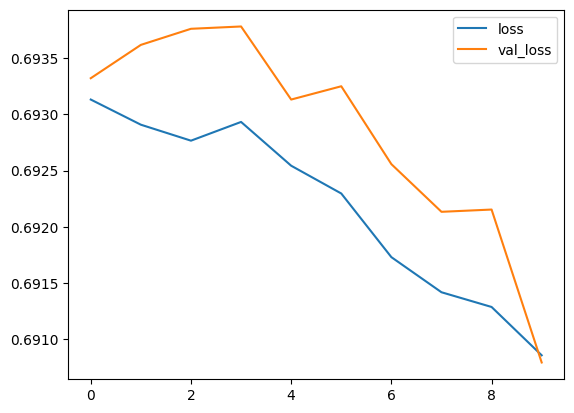

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

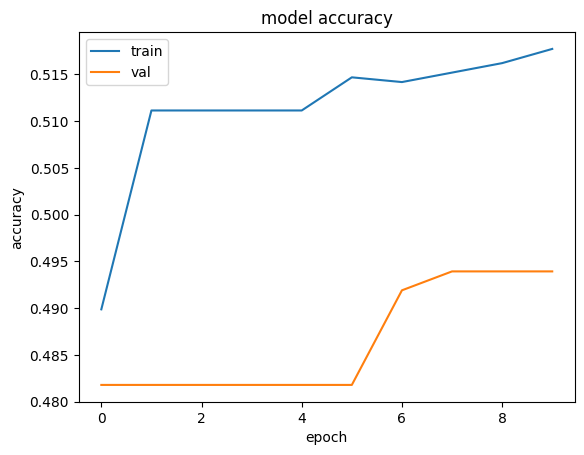

In [ ]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [ ]:
model2=Sequential()
model2.add(LSTM(50, activation='relu', input_shape=(df.shape[1], 1)))  # 50 units in LSTM layer
model2.add(Dense(1, activation='sigmoid'))  # Output layer with 1 unit (for binary classification)

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model2.fit(df, y, epochs=20, batch_size=32, verbose=1,validation_split=.2)

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 50s 703ms/step - accuracy: 0.5166 - loss: 0.6930 - val_accuracy: 0.4818 - val_loss: 0.6937
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 73s 614ms/step - accuracy: 0.5084 - loss: 0.6930 - val_accuracy: 0.4818 - val_loss: 0.6937
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 40s 646ms/step - accuracy: 0.5198 - loss: 0.6927 - val_accuracy: 0.4818 - val_loss: 0.6939
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 38s 599ms/step - accuracy: 0.5128 - loss: 0.6927 - val_accuracy: 0.4818 - val_loss: 0.6938
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 599ms/step - accuracy: 0.5112 - loss: 0.6926 - val_accuracy: 0.4818 - val_loss: 0.6936
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 604ms/step - accuracy: 0.4962 - loss: nan - val_accuracy: 0.5182 - val_loss: nan
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 605ms/step - accuracy: 0.4785 - loss: nan - val_accuracy: 0.5182 - val_loss: nan
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 608ms/step - accuracy: 0.4865 - loss: nan - val_accuracy: 0.5182 - 

In [ ]:
model3 = Sequential()
model3.add(LSTM(10, return_sequences=True, input_shape=(df.shape[1], 1),activation="relu"))

model3.add(SimpleRNN(50, dropout=0.2, recurrent_dropout=0.2,activation="relu"))

model3.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model3.fit(df, y, epochs=10, batch_size=32, verbose=1,validation_split=.2)

Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.5049 - loss: 0.6932 - val_accuracy: 0.4818 - val_loss: 0.6934
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.5201 - loss: 0.6926 - val_accuracy: 0.4818 - val_loss: 0.6940
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.5031 - loss: 0.6932 - val_accuracy: 0.4818 - val_loss: 0.6941
Epoch 4/10
60/62 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.5076 - loss: 0.6931

KeyboardInterrupt: 